# Data Cleaning

## Handling Missing Values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

from mlxtend.preprocessing import minmax_scaling
from scipy import stats

np.random.seed(0)

In [2]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=["A","B","C","D"])

In [3]:
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [4]:
df.isnull()

,A,B,C,D
0,True,False,True,False
1,False,False,True,False
2,True,True,True,False
3,True,False,True,False


In [5]:
#percentage of missing values
total_cells = np.product(df.shape)
total_missing = (df.isna().sum()).sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

50.0


In [6]:
#total nan count
df.isnull().sum()

A    3
B    1
C    4
D    0
dtype: int64

In [7]:
#drop columns with all nan values
df.dropna(how="all", axis=1)

,A,B,D
0,NaN,2.0,0
1,3.0,4.0,1
2,NaN,NaN,5
3,NaN,3.0,4


In [8]:
df.dropna(axis=0)

,A,B,C,D


In [9]:
#drop columns with any nan values
df.dropna(axis=1)

,D
0,0
1,1
2,5
3,4


In [10]:
#fill with 0 value
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [11]:
#propagate non-null values forward
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


In [12]:
#propagate non-null values backward.
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [13]:
#propagate non-null values backward then replace all the remaining na's with 0
df.fillna(method='bfill').fillna(0) 

,A,B,C,D
0,3.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,3.0,0.0,5
3,0.0,3.0,0.0,4


## Scaling and Normalization/Standardization

In scaling, you're changing the range of your data, 
while In normalization, you're changing the shape of the distribution of your data.

### Scaling <br>

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.

### Normalization/Standardization <br>
Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution. In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

<img src="sn.png" width="1200" height="300">

In [14]:
data = np.random.exponential(size=1000)

In [15]:
mm_scaler = preprocessing.MinMaxScaler()
scaled_data = mm_scaler.fit_transform(data.reshape(-1,1))
print(scaled_data.min(), scaled_data.max())

0.0 1.0


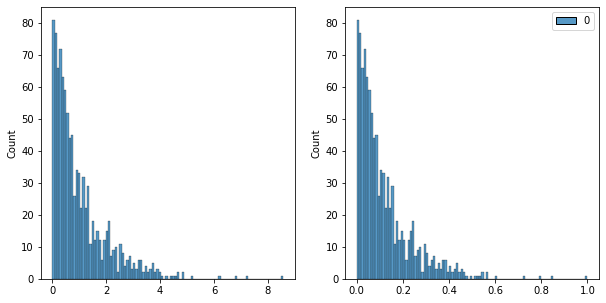

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data, ax=axes[0], bins=100)
sns.histplot(scaled_data, ax=axes[1], bins=100)
plt.show()

In [17]:
#n_data = preprocessing.normalize(data.reshape(-1,1))
s_scaler = preprocessing.StandardScaler()
s_data = s_scaler.fit_transform(data.reshape(-1,1))

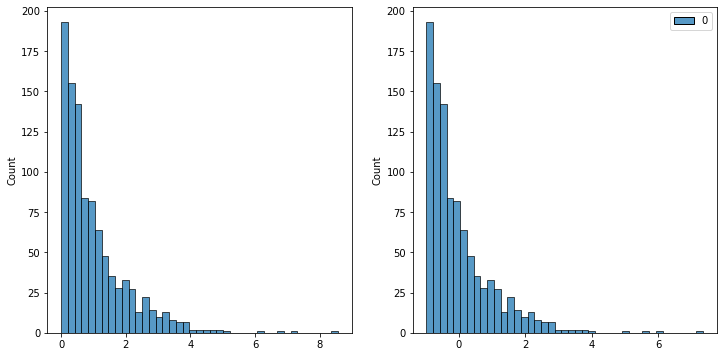

-0.97, 7.3, 1.0, -0.0000, 


In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.histplot(data, ax=axes[0])
sns.histplot(s_data,ax=axes[1])
plt.show()
print(f"{s_data.min():.02}, {s_data.max():.02}, {s_data.std():.02}, {s_data.mean():.4f}, ")

## Parsing Dates

In [19]:
# https://strftime.org/

In [20]:
# create a new column, date_parsed, with the parsed dates
#df['date_parsed'] = pd.to_datetime(df['date'], format="%m/%d/%y")
# try to infer what the right date format should be
#df['date_parsed'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
# day of the month from the date_parsed column
#df['date_parsed'].dt.day

## Character Encodings

In [21]:
#import chardet
#with open("abc.csv", 'rb') as rawdata:
#    result = chardet.detect(rawdata.read(10000))

## Inconsistent Data Entry

In [22]:
#import fuzzywuzzy
#from fuzzywuzzy import process
#import chardet

In [23]:
#use the fuzzywuzzy package to help identify which strings are closest to each other